In [1]:
import numpy as np
import glob

import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', metrics=['accuracy'], loss='categorical_crossentropy')
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


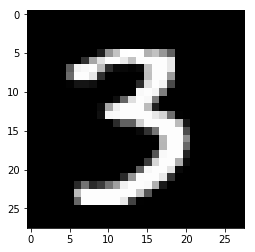

In [24]:
plt.imshow(x_train[10000].reshape(28,28), cmap = 'gray')
plt.show()

In [23]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s     


[1.59468332862854, 0.86639999999999995]

In [34]:
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
K.set_image_dim_ordering('th')

In [44]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

x_train = x_train.reshape(-1,1,28,28).astype('float32')
datagen.fit(x_train.reshape(-1,1,28,28).astype('float32'))

In [54]:
x_aug = []
y_aug = []

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=100):
    x_aug.append(X_batch)
    y_aug.append(y_batch)
    break

In [64]:
x_aug = np.array(x_aug).reshape(-1,28,28)
y_aug = np.array(y_aug).reshape(-1,10)